In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df= pd.read_csv('t1.csv')
df.head()

,Unnamed: 0,category,description,title,brand,date,price,asin,imageURL,overall,verified,reviewTime,reviewText,reviewerID,Sentimental
0,0,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],3,False,"11 3, 2006","I thought the book was entertaining and cute, ...",A2WJLOXXIB7NF3,Neutral
1,1,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],5,False,"05 9, 2006",This adorable story is an all time favorite fa...,A1RKICUK0GG6VF,Positive
2,2,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],5,False,"03 11, 2006",Lisa's bear Corduroy gets lost in the laundrom...,A1QA5E50M398VW,Positive
3,3,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],5,False,"01 24, 2001",In this installment of Corduroy's adventures w...,A3N0HBW8IP8CZQ,Positive
4,4,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],5,False,"07 30, 2000",Researchers constantly find that reading to ch...,A1K1JW1C5CUSUZ,Positive


In [5]:
df1=df[['reviewerID','asin','overall']]
df1.head()

,reviewerID,asin,overall
0,A2WJLOXXIB7NF3,0140503528,3
1,A1RKICUK0GG6VF,0140503528,5
2,A1QA5E50M398VW,0140503528,5
3,A3N0HBW8IP8CZQ,0140503528,5
4,A1K1JW1C5CUSUZ,0140503528,5


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6469 entries, 0 to 6468
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewerID  6469 non-null   object
 1   asin        6469 non-null   object
 2   overall     6469 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 151.7+ KB


In [7]:
df1.describe()

,overall
count,6469.000000
mean,4.443036
std,1.095350
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
df1.isnull().sum()

reviewerID    0
asin          0
overall       0
dtype: int64

In [9]:
df1.shape

(6469, 3)

In [10]:
df1.drop_duplicates(inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_6688\4156330626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [11]:
df1.shape

(6453, 3)

C:\Users\prabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overall', ylabel='count'>

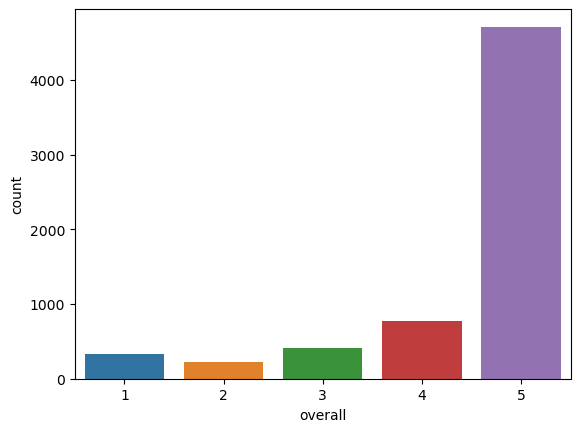

In [12]:
sb.countplot(df1['overall'])

In [13]:
print("total rating =",len(df1['overall']))
print("Total unique users = ",df1['reviewerID'].nunique())
print("Total unique Products = ",df1['asin'].nunique())

total rating = 6453
Total unique users =  6359
Total unique Products =  113


Analyzing the rating by user

In [14]:
no_of_rated_product_per_user = df1.groupby(by='reviewerID')['overall'].count().sort_values(ascending=False)
no_of_rated_product_per_user.head()

reviewerID
A39M3CCDR9PHZ3    3
A29340LLEPKJBD    3
AZZKYP9254H32     2
A2KWGT1IBMK9YA    2
A2H4HPZ9UKZG9T    2
Name: overall, dtype: int64

<AxesSubplot:xlabel='reviewerID'>

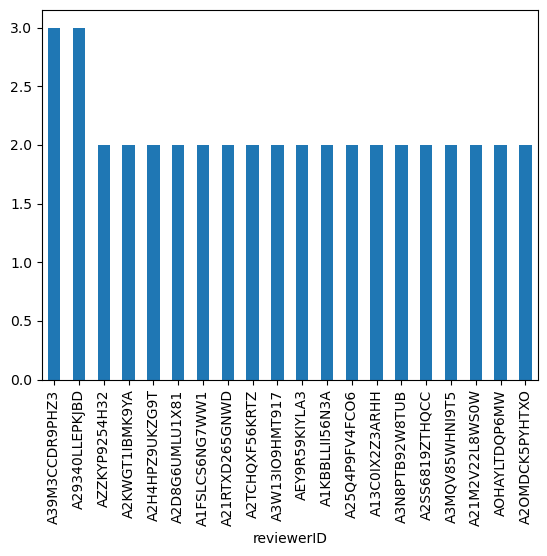

In [15]:
no_of_rated_product_per_user.head(20).plot(kind='bar')

# Average Rating Product

In [16]:
mean_rating_prodcut_count = pd.DataFrame(df1.groupby('asin')['overall'].mean())

In [17]:
mean_rating_prodcut_count.head()

,overall
asin,
0140503528,4.573913
0245109919,5.000000
0439394058,4.153846
043949950X,5.000000
0439537886,4.458333


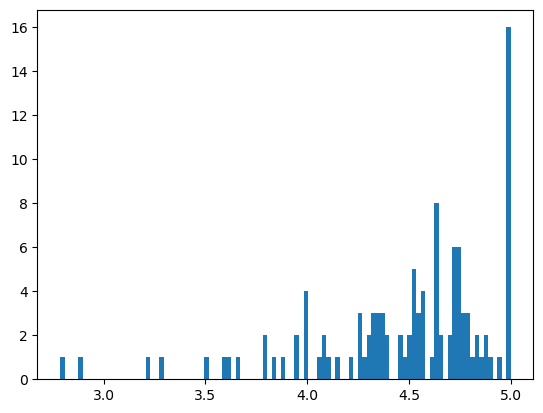

In [18]:
# plot the rating distribution of average rating product
plt.hist(mean_rating_prodcut_count['overall'],bins=100);

In [19]:
mean_rating_prodcut_count['overall'].skew()

-1.367214023466005

In [20]:
!pip install numpy

In [3]:
#conda install -c conda-forge scikit-surprise 

^C

Note: you may need to restart the kernel to use updated packages.


In [43]:
#conda install -c conda-forge scikit-surprise

^C

Note: you may need to restart the kernel to use updated packages.


In [1]:
#import surprise libraru for collabrative filtering
#!pip install scikit-surprise



In [22]:

from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [23]:
reader = Reader(rating_scale=(1,5))
surprise_data = Dataset.load_from_df(df1,reader)

In [24]:
#splitting surprise the dataset into 80:20
train,test= train_test_split(surprise_data,test_size=0.3,random_state=47)

In [25]:
algo = KNNWithMeans(k=5,sim_options={'name':'pearson_baseline','used_based':False})
algo.fit(train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [26]:
#make prediction using test
test_pred = algo.test(test)

In [27]:
#print RMSE
print("Item-Based Model : Test set")
accuracy.rmse(test_pred,verbose=True)

Item-Based Model : Test set
RMSE: 1.1008


1.1008093400614696

# Model Based collabrative filtering system

In [29]:
df1.shape

(6453, 3)

In [30]:
rating_matrix = df1.pivot_table(values='overall',index='reviewerID',columns='asin',fill_value=0)
rating_matrix.head()

asin,0140503528,0245109919,0439394058,043949950X,0439537886,0439654939,0439731593,0439731771,0439784395,0439893577,...,1412461502,1420623842,1420625519,143211901X,143212319X,1439716021,1439722056,1439723605,1439723974,1439733848
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0440970QIFGYIPSB9LS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0776669NZZD6IZI2J5P,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A101ZOK2TBMRRO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1043K299ZPBF3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A104WVBZF2E8RK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


above we have created a pivot table of the rating where the value of the column will overall(rating) and index will be userid and the column name will be asin(product id)

In [31]:
rating_matrix.shape

(6359, 113)

In [32]:
# transpose
x_rating_matrix = rating_matrix.T
x_rating_matrix.head()

reviewerID,A0440970QIFGYIPSB9LS,A0776669NZZD6IZI2J5P,A101ZOK2TBMRRO,A1043K299ZPBF3,A104WVBZF2E8RK,A105EIL1JQTKT3,A105U7N378AEMU,A1082P5RC0BHDH,A109IZEXC99W4O,A10BOZ1ZHLXBBG,...,AZLGR17FVO2OY,AZM37TWZI9AZE,AZMVYZV9U2RK1,AZNBLDMT25T4X,AZROB4UNA8ALA,AZS6EGF30IMXK,AZV5O5KBTWN0D,AZY0XLDB3N5AU,AZY6MR9GIMQ4Y,AZZKYP9254H32
asin,,,,,,,,,,,,,,,,,,,,,
0140503528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
0245109919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0439394058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
043949950X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0439537886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
x_rating_matrix.shape

(113, 6359)

In [34]:
# Decomposition of the matrix
from sklearn.decomposition import TruncatedSVD

In [35]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_rating_matrix)
decomposed_matrix.shape

(113, 10)

In [36]:
#corelation matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(113, 113)

In [37]:
x_rating_matrix.index[10]

'0439899095'

In [44]:
i="0439899095"
product_name = list(x_rating_matrix.index)
product_id = product_name.index(i)
print(product_id)

10


In [47]:
correlation_product_id = correlation_matrix[product_id]
correlation_product_id.shape

(113,)

In [48]:
correlation_matrix[correlation_product_id>0.85].shape

(27, 113)

In [53]:
#reccomending top 20 highly correlated products in sequence
recommend = list(x_rating_matrix.index[correlation_product_id > 0.95])
recommend[:20]

['0439731593',
 '0439899095',
 '0545114802',
 '0545114829',
 '0545161177',
 '0545301564',
 '0629150591',
 '0641079605',
 '0792293177',
 '098451631X']